In [3]:
import networkx as nx
import numpy as np
import os
import json
import matplotlib.pyplot as plt
def connectivity(G):
    return nx.is_connected(G)


def avg_shortest_path_length(G):
    return nx.average_shortest_path_length(G, weight='dis')

/home/ygan11/quantum_topo_design_2024/topo_gen/src


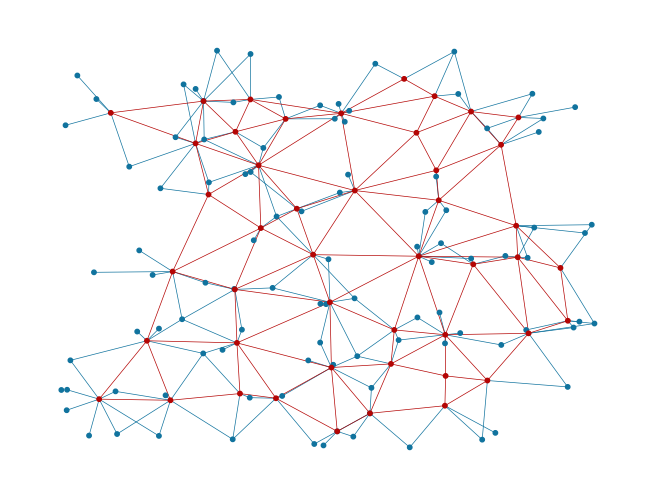

Topo:  deepPlace-100-8.json
Link failure rate:  0.01


NameError: name 'avg_shortest_path_length' is not defined

In [6]:
# measure "Conncectivity" of a graph G and average 1st shortest path length for all pairs of nodes
from config import link_failure_rate
from utils import graph_plot

import networkx as nx
import numpy as np
import os
import json
import matplotlib.pyplot as plt

from topo_resilience_eval import G_removed_edges

# topo_files = [f for f in os.listdir("../dist/topos/")]

topo_files = ["deepPlace-100-8.json"]



# print current working directory
print(os.getcwd())

# with open('/home/ygan11/quantum_topo_design_2024/topo_gen/dist/topos/deepPlace-100-3.json', 'r') as f:
# with open('../dist/topos/deepPlace-400-3.json', 'r') as f:
#     graph = json.load(f)
#     G = nx.node_link_graph(graph)

p_lens = []
for r in link_failure_rate:
    for topo_file in topo_files:
        G = G_removed_edges(topo_file, failure_rate=r)
        graph_plot(G)
        print("Topo: ", topo_file)
        print("Link failure rate: ", r)
        # print("Connectivity: ", connectivity(G))
        
        avg_p_len = avg_shortest_path_length(G)
        p_lens.append(avg_p_len)
        print("Average shortest path length: ", avg_p_len)
        print("\n")



# plot the average shortest path length for all pairs of nodes for different link failure rates
        
plt.plot(link_failure_rate, p_lens)



Path statistics: 


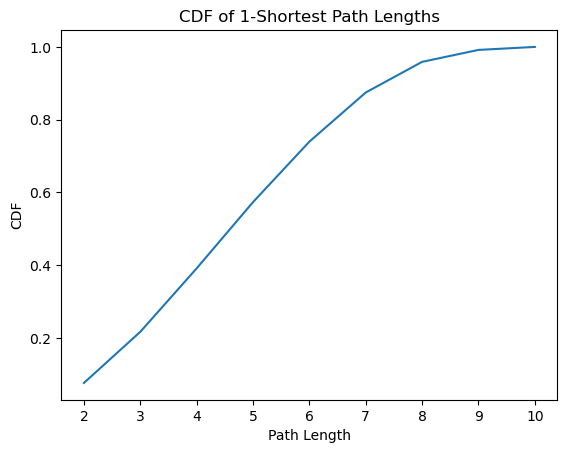

Average Path Length: 525.3607720007118
Standard Deviation of Path Lengths: 1.8955209494887497
Maximum Path Length: 10
Minimum Path Length: 2
Average Degree: 4.622950819672131
Path statistics: 


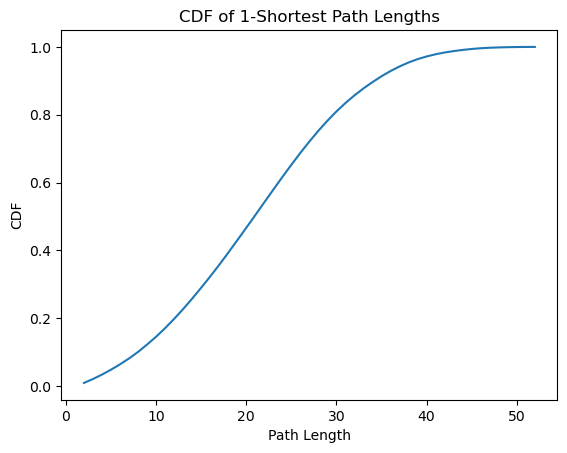

Average Path Length: 1051.783970151939
Standard Deviation of Path Lengths: 9.796131567279394
Maximum Path Length: 52
Minimum Path Length: 2
Average Degree: 1.9907834101382489


In [4]:
# Get the total cost of each topo
from utils import total_cost
from topo_resilience_eval import get_path_statistics
import json
import networkx as nx

with open('../dist/topos/deepPlace-400-0.json', 'r') as f:
    graph = json.load(f)
    G = nx.node_link_graph(graph)
    print("Path statistics: ")
    get_path_statistics(G, 1)

print("=====================================================================")

with open('../dist/topos/steiner-400-0.json', 'r') as f:
    graph = json.load(f)
    G = nx.node_link_graph(graph)
    #print("Total cost of f: ", total_cost(G))
    print("Path statistics: ")
    get_path_statistics(G, 1)